## 🐍🐼 Python-Pandas: Agrupaciones dinámicas con groupby + agg

¿Sabías que con pandas puedes analizar tus datos en profundidad y optimizar tu flujo de trabajo en ciencia de datos? 🧠 Hoy exploramos cómo las agrupaciones anidadas pueden ofrecer insights que cambian las reglas del juego.

### 🔍 Un escenario interesante:
El Titanic 🚢: un dataset clásico que contiene información sobre pasajeros como su edad, clase, tarifa, puerto de embarque y si sobrevivieron.

### ¿Qué puedes descubrir?
- ✨ ¿Cuál es la tasa de supervivencia por clase y género?
- 🎯 ¿Qué rango de edad pagó más en promedio?
- 🔢 ¿Cuántos pasajeros únicos embarcaron desde cada puerto?

### 💻 El truco
Con `groupby` y `agg`, puedes realizar cálculos como promedio, conteos y más en una sola línea de código. Esta técnica es esencial para análisis exploratorio, optimizando el tiempo y aumentando el impacto de tus hallazgos.

### 🚀 Impacto real en el negocio:
Desde segmentación de clientes hasta análisis demográficos, esta técnica te ayuda a tomar decisiones informadas basadas en datos.

### 💬 Reflexión
¿Qué patrones encuentras más útiles en tus datasets? Compártelos en los comentarios y no olvides seguirme para más contenido que transforma la complejidad en claridad.

[Enlace a GitHub](https://github.com/jcombari/PyForAll)

 🌍✨ #machinelearning #datascience #python #pandas #analytics

---

## 🐍🐼 Python-Pandas: Dynamic Grouping with groupby + agg

Did you know that with pandas, you can dive deep into your data and optimize your data science workflows? 🧠 Today, we explore how nested groupings can unlock game-changing insights.

### 🔍 A fascinating scenario:
The Titanic 🚢: a classic dataset with details about passengers, including age, class, fare, embarkation port, and survival status.

### What can you uncover?
- ✨ Survival rates by class and gender.
- 🎯 Which age group paid the highest average fare?
- 🔢 How many unique passengers embarked from each port?

### 💻 The trick
Using `groupby` and `agg`, you can perform multiple calculations—like averages and counts—in just one step. This is a must-have technique for exploratory data analysis, saving time and boosting your analytical impact.

### 🚀 Real business impact:
From customer segmentation to demographic analysis, this approach helps you make data-driven decisions with confidence.

### 💬 Reflection
What patterns do you find most useful in your datasets? Share them in the comments and follow me for more content that transforms complexity into clarity.

[GitHub Link](https://github.com/jcombari/PyForAll)

 🌍✨ #machinelearning #datascience #python #pandas #analytics


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
    class     sex  survival_rate  passenger_count
0   First  female       0.968085               94
1   First    male       0.368852              122
2  Second  female       0.921053               76
3  Second    male  

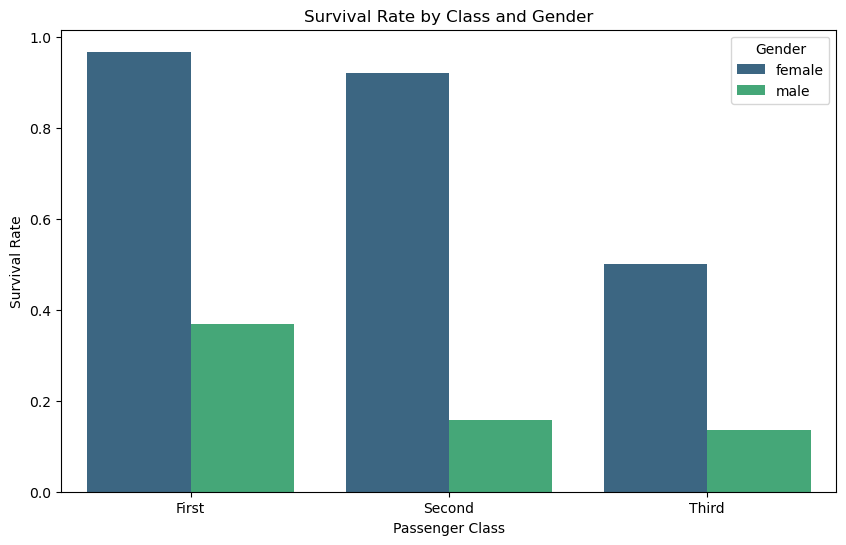

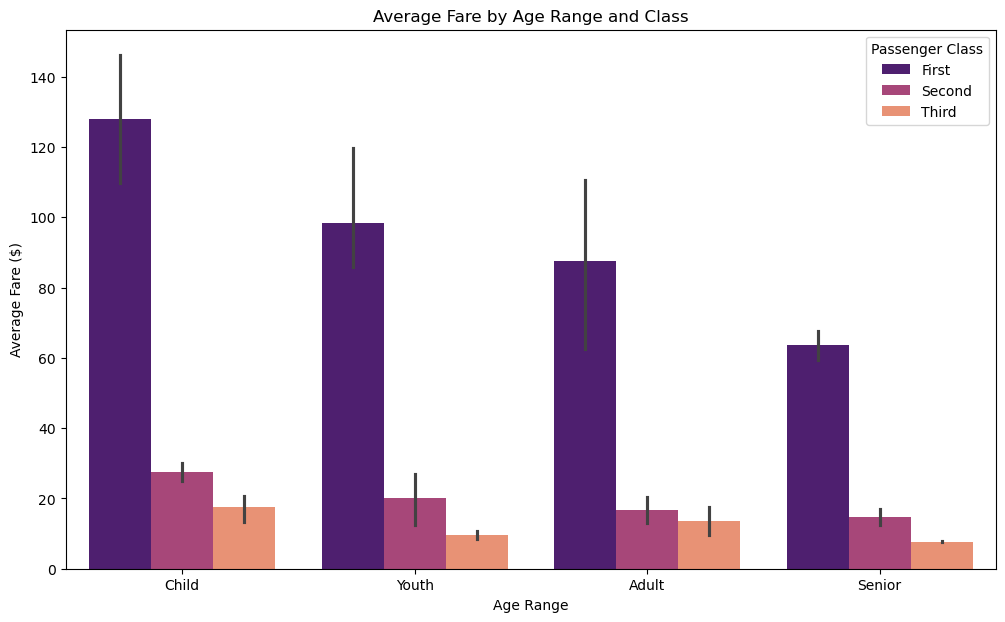

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows to understand the dataset
print(titanic.head())

# Group by class and gender to calculate survival rate and passenger count
grouped_data = titanic.groupby(['class', 'sex'], observed=False).agg(
    survival_rate=('survived', 'mean'),   # Calculate mean survival rate
    passenger_count=('survived', 'count')  # Count the number of passengers
).reset_index()

# Display the grouped data
print(grouped_data)

# Add an age range column for more granularity
titanic['age_range'] = pd.cut(
    titanic['age'], bins=[0, 18, 35, 50, 80], labels=['Child', 'Youth', 'Adult', 'Senior']
)

# Group by age range, class, and embark town for detailed insights
detailed_group = titanic.groupby(['age_range', 'class', 'embark_town'], observed=False).agg(
    avg_fare=('fare', 'mean'),  # Calculate the average fare
    survival_rate=('survived', 'mean'),  # Calculate mean survival rate
    total_passengers=('survived', 'count')  # Count the total passengers
).reset_index()

# Display the detailed grouped data
print(detailed_group)

# Visualize survival rates by class and gender
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='class', y='survival_rate', hue='sex', palette='viridis')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Gender')
plt.show()

# Visualize average fare by age range, class, and embark town
plt.figure(figsize=(12, 7))
sns.barplot(data=detailed_group, x='age_range', y='avg_fare', hue='class', palette='magma')
plt.title('Average Fare by Age Range and Class')
plt.ylabel('Average Fare ($)')
plt.xlabel('Age Range')
plt.legend(title='Passenger Class')
plt.show()
